Проверка стат гипотез
1. Выбор H0 и Н1
2. Выбор метрики
3. Данные (количественные или качественные), распределение, выбросы
4. Эксперимент
5. Оценки, критерии
6. Анализ

- Н0 – данные равны
- Н1 - в данных присутствуют различия.
- Ошибка 1 рода: нулевая гипотеза принята, хотя она ложна, т.е. сделано предположение что эффект реальный, когда как результат обусловлен случайностью, в таком случае появляются FN.
- Ошибка 2 рода: принята альтернивная гипотеза, хотя эффект ложный, т.е. нельзя было отклонять нулевую гипотезу. FP. 

Зачем?
1. Оценка динамики явления — паспределения, как изменяется процесс и тд.
2. Анализ различий между группами (статистическими совокупностями) в зависимости от типа данных и распределения количественных данных, количества и связанности групп может применяться большое количество инструментов. Критерии согласия, T Test и тд.
3. Выявление и оценка взаимовлияний в динамике — методы корелляционного анализа.
4. Прогноз явлений — используются линейные и логистические регрессии, деревья решений, нейронные сети, различные вариантры дискриминативного анализа
5. Группировка явлений и выявление общих свойств группы — варианты кластерного анализа.


In [7]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "vibor_stat_kriteria-1024x774.png") #КАК ВЫБРАТЬ КРИТЕРИЙ

СТОИТ СРАЗУ ПОДЕЛИТЬ ВСЕ КРИТЕРИИ НА 2 КАТЕГОРИИ:
1. НЕпараметрические (Манна-Уитни, Пирсона, Колмогорова-Cмирнова и тд)
2. параметрические (Крит. Стюдента, Фишера...)

In [166]:
#1 data
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
df = pd.read_csv('life_expectancy.csv')


In [167]:
first = df[df['Gender'] == 'Female']['2006-2010'] #women 2006 2010 years
second = df[df['Gender'] == 'Female']['2010-2014'] #women 2010 2014 years


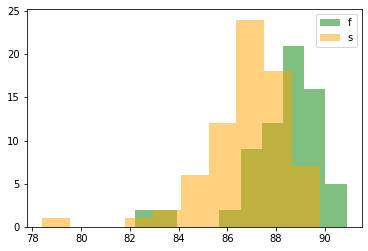

In [168]:
fig, ax = plt.subplots()
plt.hist(first, color = 'green', alpha = 0.5)
plt.hist(second, color = 'orange', alpha = 0.5)
plt.legend('fs')
plt.show() # нужно избавиться от хвостиков минимальных значений

In [128]:
# drop min max 

In [148]:
q_low = first.quantile(0.05)
q_hi  = first.quantile(0.99)
firstF = first[(first< q_hi) & (first > q_low)]

q_low1 = second.quantile(0.05)
q_hi1  = second.quantile(0.99)
secondF = second[(second< q_hi) & (second > q_low)]

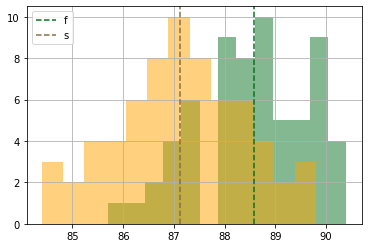

In [195]:

firstF.hist(bins = 13, color = '#087222', alpha = 0.5)
secondF.hist(bins = 13, color = 'orange', alpha = 0.5)
plt.axvline(firstF.mean(), color = '#087222', linestyle= '--')
plt.axvline(secondF.mean(), color = '#866E49', linestyle= '--')
plt.legend('fs')

2. Нормальность

Если про выборки заранее известно, что они подчиняются нормальному распределению, то к ним становится возможно применять более мощные параметрические критерии. Проверка нормальность часто выполняется на первом шаге анализа выборки, чтобы решить, использовать далее параметрические методы или непараметрические. В справочнике А. И. Кобзаря приведена сравнительная таблица мощности для 21 критерия нормальности.

Критерий Шапиро-Уилка является специальным критерием нормальности
и используется для проверки гипотезы о нормальном распределении


In [157]:
# Shapiro-Wilk Test
res = stats.shapiro(np.log(firstF))
print(f'p-value: {res[1]}')

p-value: 0.13978296518325806


In [173]:
# D'Agostino and Pearson's Test второй вариант теста через ассиметрию 
from scipy.stats import normaltest
res1 = normaltest(np.log(secondF))
print((f'p-value: {res1[1]}'))

p-value: 0.5823500792437954


Нулевая гипотеза H0 теста Шапиро–Уилка заключается в том, что случайная величина, выборка x которой известна, распределена по нормальному
закону. Альтернативная гипотеза H1 заключается в том, закон распределения не является нормальным.

В нашем случае p-value больше чем 0.05 мы не можем отвергнуть нулевую гиппотезу. Следовательно у нас отклонение от нормальности не существенно


3. Критерий Манна-Уитни U-test

U-критерий Манна-Уитни используется для оценки различий между двумя независимыми выборками по уровню какого-либо количественного признака. 

Проверяется гипотеза сдвига, согласно которой распределения двух выборок имеют одинаковую форму и отличаются только сдвигом на константу.


In [191]:
res2 = stats.mannwhitneyu(firstF, secondF)
print(f'p-value: {res2[1]}')

p-value: 1.969588990480091e-09


p value супер маленький значит отвергаем нулевую гипотезу. Основная гипотеза тут на равенство или схожесть. Продолжит. стала другая  и статистически значима разность

4. T TEST

Одновыборочный t-тест предназначен для проверки равенства математического ожидания нормально распределенной случайной величины (для которой известна лишь выборка) некоторому заданному значению в предположении, что дисперсия не известна. 

Наиболее часто t-критерии применяются для проверки равенства средних значений в двух выборках. Нулевая гипотеза предполагает, что средние равны (отрицание этого предположения называют гипотезой сдвига).


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html




In [259]:
res3 = stats.ttest_ind(firstF, secondF, equal_var = False)
# equal_var параметр дисперсии у нас они разные проверяли в пункте 3. Дисперсия важный параметр 
print(f'p-value: {res3[1]}')

p-value: 1.3811055753083874e-10


Результат статистически значимый. Отвергаем Н0 

5. Гипотеза однородности. χ2. Критерий согласия χ2 Пирсона применяется для проверки гипотезы о том, согласуется ли заданная выборка с заданным фиксированным распределением (отличное от ожидаемого распределения). Показывает общ. информацию, но не дает информации и конкретных переменных. 

Таким образом, если задана (явно или неявно) таблица сопряженности, то
выполняется тест с нулевой гипотезой «случайные величины независимы»
и альтернативной «случайные величины зависимы», в остальных случаях
проверяется нулевая гипотеза «X имеет заданное распределение», где распределение определяется вектором p.


Нужны новые выборки.
Мужчины и женщины за 2006г. Проверяем есть ли разница м. продолжительностями жизни у мужчин и женщин и значима ли она 

In [296]:
women = df[df['Gender'] == 'Female']['2006-2010'] #women 2006 2010 years
men = df[df['Gender'] == 'Male']['2006-2010'] #women 2010 2014 years
dff = pd.DataFrame([[66, 81], [71, 91]], columns = ['2006', '2010'], index = ['man','women'])
dff

,2006,2010
man,66,81
women,71,91


In [297]:
res = stats.chi2_contingency(dff) #однородно ли распределение продолжительности жизни

In [300]:
print('p-value:', res[1])
print('x2:', res[0])

p-value: 0.9405513140164317
x2: 0.005561721519932625


6. КОРРЕЛЯЦИЯ используется для проверки и характера взаимосвязи двух переменных.
Гипотеза: H0: отсутствует линейная связь между выборками.

Неустойчивость к выбросам.

С помощью коэффициента корреляции Пирсона можно определить силу линейной зависимости между величинами, другие виды взаимосвязей выявляются методами регрессионного анализа.

Необходимо понимать различие понятий "независимость" и "некоррелированность". Из первого следует второе, но не наоборот.

In [261]:
corr_data = pd.read_csv('wine-clustering.csv')
corr_data['Alcohol'], corr_data['Proline']

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [265]:
corr = stats.pearsonr(corr_data['Alcohol'], corr_data['Proline']) # проверяет если ли связь гипотеза что корреляция равна или нет 0. H0 
print(f'correlation: {corr[0]}, p-value: {corr[1]}')

correlation: 0.6437200371782135, p-value: 3.288368689992126e-22


Text(11, 1500, 'corr: 0.64')

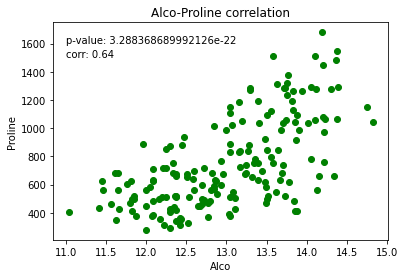

In [283]:
fig, ax = plt.subplots()
fig = matplotlib.pyplot.scatter(corr_data['Alcohol'], corr_data['Proline'], c = 'green')
plt.xlabel('Alco')
plt.ylabel('Proline')
plt.title('Alco-Proline correlation')
plt.annotate(xy = [11, 1600], text = 'p-value: 3.288368689992126e-22')
plt.annotate(xy = [11, 1500], text = 'corr: 0.64')


По графику видно, что есть корреляция 0.64, имеет место отклонение нулевой теории. 